In [1]:
import tensorflow as tf
import pandas as pd 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import os

df_external = pd.read_csv(os.path.join(os.getcwd(),'Step 3 External Validation Datasets/randomNegatives Step 3 External Validation Set.csv'))

In [2]:
###2.# Define the directory where your models are saved

parent_dir = os.path.dirname(os.getcwd())


model_directory = os.path.join(parent_dir, 'Step 3 External Validation/Classification Models/Complete Set 1 Models')

models = []
#,8,9,10,11,12,13,14,15,16,17,18,41
# Assuming your models are named 'model_0.h5', 'model_1.h5', ..., 'model_19.h5'
model_paths = [os.path.join(model_directory, f'ROBOMechDB Complete Set 1 Model Seed {i+1}.keras') for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,41]]


for path in model_paths:
    print(f'Loading model from {path}')
    model = tf.keras.models.load_model(path)
    models.append(model)
    print(f'Model from {path} loaded successfully')

Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-15-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 1.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-15-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 1.keras loaded successfully
Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-15-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 2.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-15-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 2.keras loaded successfully
Loading model from /Users/eding/PycharmProjects/U24-ROBOKOP-Project-8-15-24/External Validation/Classification Models/Complete Set 1 Models/ROBOMechDB Complete Set 1 Model Seed 3.keras
Model from /Users/eding/PycharmProjects/U24-ROBOKOP

In [3]:
prediction_matrix = []
for j in range(len(models)):
    prediction_value = models[j].predict(df_external.iloc[:,3:-1])
    prediction_value = prediction_value.flatten()
    prediction_matrix.append(prediction_value)

prediction_matrix = np.array(prediction_matrix)

632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step


In [4]:
stability_matrix = prediction_matrix.T

pos_avg_predictions = []
pos_predictions_stdevs= []
neg_avg_predictions = []
neg_predictions_stdevs= []
for i in range(len(stability_matrix)):
    mean_pred_value = np.mean(stability_matrix[i])
    std_dev_pred_value = np.std(stability_matrix[i])
    if mean_pred_value <0.5:
        neg_avg_predictions.append(mean_pred_value)
        neg_predictions_stdevs.append(std_dev_pred_value)
    elif mean_pred_value >=0.5:
        pos_avg_predictions.append(mean_pred_value)
        pos_predictions_stdevs.append(std_dev_pred_value)

pos_rmsd = np.mean(pos_predictions_stdevs)
neg_rmsd = np.mean(neg_predictions_stdevs)
print('pos_rmsd:', pos_rmsd)
print('neg_rmsd:', neg_rmsd)

pos_rmsd: 0.07881977
neg_rmsd: 0.061055038


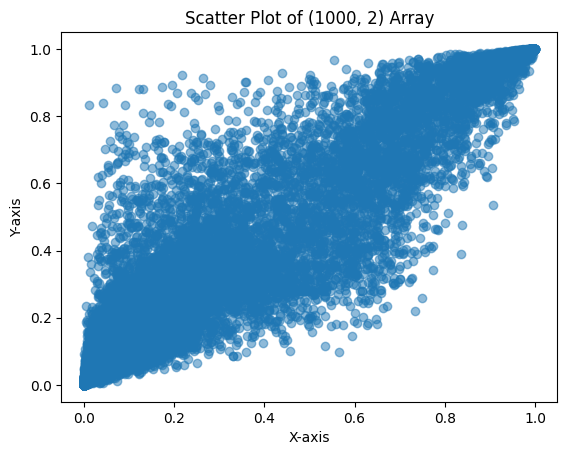

0.8437912903586993


In [6]:
from sklearn.metrics import r2_score

x = stability_matrix[:, 3]
y = stability_matrix[:, 15]

# Step 3: Create a scatter plot
plt.scatter(x, y, alpha=0.5)  # alpha=0.5 makes the points slightly transparent
plt.title('Scatter Plot of (1000, 2) Array')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
print(r2_score(x, y))

In [7]:
###5. averaging all model predictions

####CALCULATE ENSEMBLE AVERAGE PREDICTION VALUES

model_prediction_floats = np.array([np.mean(row) for row in stability_matrix])

model_prediction_std = np.array([np.std(row) for row in stability_matrix])

model_prediction_rmsd = np.mean(model_prediction_std)

print(model_prediction_rmsd)
print(model_prediction_std[:10])
print(stability_matrix[:10])

0.06468743
[0.08318428 0.1486901  0.16470912 0.01970374 0.05328396 0.15592447
 0.01385333 0.1364009  0.00524789 0.00103252]
[[0.53999066 0.8254602  0.8406647  0.7156827  0.86456907 0.8252434
  0.9077721  0.7791042  0.8180879  0.68409365 0.7644515  0.8303951
  0.90057504 0.7952714  0.8268543  0.8717315  0.7211625  0.86539984
  0.8447562  0.81103635]
 [0.21675321 0.35166368 0.25657865 0.37163213 0.71281844 0.5180931
  0.6252365  0.544319   0.49178252 0.40769967 0.6333284  0.39331698
  0.515874   0.53575903 0.52996755 0.2636801  0.302239   0.25117
  0.28428233 0.21314207]
 [0.21357727 0.5680925  0.18054307 0.15618065 0.4802066  0.23998564
  0.41651216 0.35671616 0.55763835 0.4343894  0.66758406 0.4339624
  0.30084872 0.69466686 0.242024   0.432598   0.3035432  0.33531368
  0.11730143 0.18492004]
 [0.94436073 0.9496101  0.9921799  0.9373003  0.944035   0.9753344
  0.9679569  0.97955364 0.964471   0.91004455 0.984144   0.9692443
  0.97109866 0.9762229  0.97249377 0.99147636 0.9694818  0.983

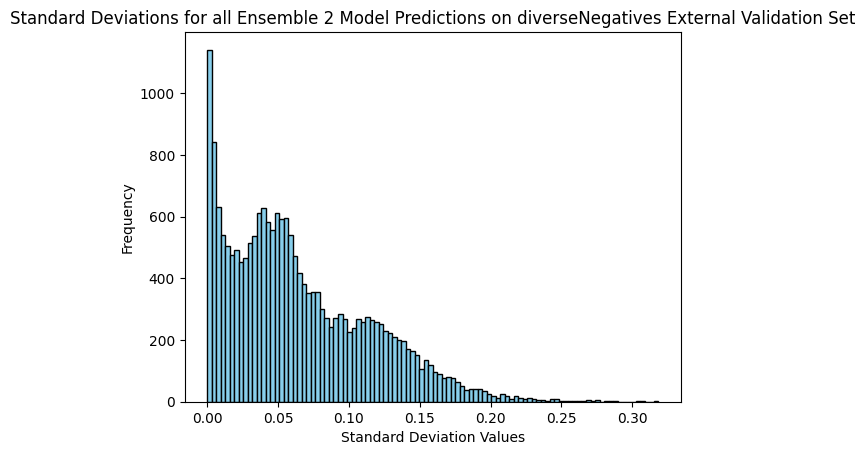

In [8]:
plt.hist(model_prediction_std, bins=100, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Standard Deviation Values')
plt.ylabel('Frequency')
plt.title('Standard Deviations for all Ensemble 2 Model Predictions on diverseNegatives Step 3 External Validation Set')
 

# Display the plot
plt.show()

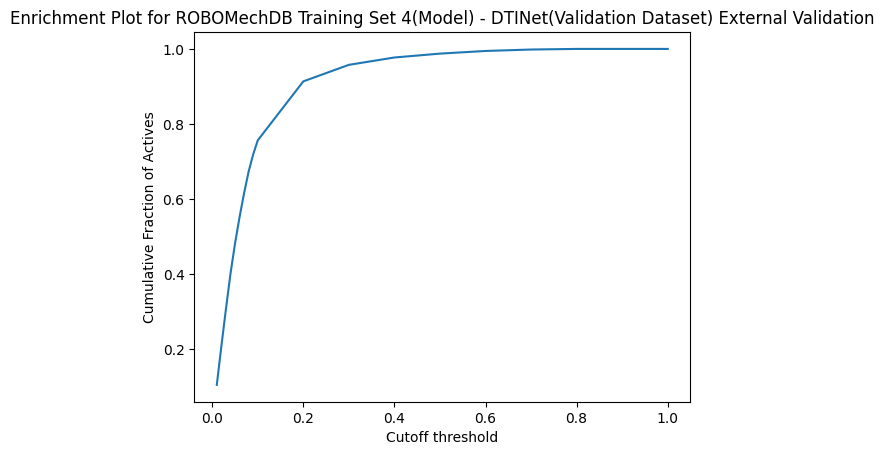

In [9]:
###6. Generate enrichment curve!

###README BELOW

#chi_cutoff_thresholds = the top % percent of model predictions evaluated
#N is equal to the total number of triples in the entire validation dataset, and Ns is equal to the total number of triples above the cutoff threshold. 
#ns is equal to the total number of true positives above the cutoff threshold, and n is equal to the total number of true positives across the whole dataset.

descending_confidence_values = np.sort(model_prediction_floats.flatten())[::-1]
ascending_indices = np.argsort(model_prediction_floats.flatten())
descending_indices = np.flip(ascending_indices)

chi_cutoff_thresholds = [0.01, 0.02, 0.03, 0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

enrichment_percent_array = []
y_values = []

N = len(model_prediction_floats)

n=0
for z in range(len(df_external)):
    if df_external.iloc[z,-1] == 1:
        n=n+1
        
for i in chi_cutoff_thresholds: 
    ns = 0
    Ns = len(model_prediction_floats)*i
    for j in range(int(i*len(model_prediction_floats))):
        if df_external.iloc[descending_indices[j],-1]==1:
            ns = ns+1
            
    y_value = ns/n
    y_values.append(y_value)

plt.xlabel("Cutoff threshold")
plt.ylabel("Cumulative Fraction of Actives")
plt.title("Enrichment Plot for ROBOMechDB Training Set 4(Model) - DTINet(Validation Dataset) Step 3 External Validation")

plt.plot(chi_cutoff_thresholds, y_values)

fpr,tpr, thresholds = roc_curve(df_external.iloc[:,-1],model_prediction_floats)

roc_auc = auc(fpr, tpr)

In [10]:
### 7. Generate statistics!

true_positive_count = 0
false_negative_count = 0
false_positive_count = 0
true_negative_count = 0



for i in range (0,len(model_prediction_floats)):
    if np.round(model_prediction_floats[i]) == 1 and np.round(df_external.iloc[i,-1]) == 1:
        true_positive_count += 1
    if np.round(model_prediction_floats[i]) == 0 and np.round(df_external.iloc[i,-1]) == 1:
        false_negative_count +=1
    if np.round(model_prediction_floats[i]) == 1 and np.round(df_external.iloc[i,-1]) == 0:
        false_positive_count +=1
    if np.round(model_prediction_floats[i]) == 0 and np.round(df_external.iloc[i,-1]) == 0:
        true_negative_count +=1

true_pos_rate = true_positive_count/(true_positive_count+false_negative_count)
true_neg_rate = true_negative_count/(false_positive_count+true_negative_count)

performance_array = np.array(y_values+[roc_auc,true_pos_rate,true_neg_rate,model_prediction_rmsd]).reshape(1,23)
print(performance_array.shape)
column_names = ['0.01', '0.02', '0.03','0.04','0.05','0.06','0.07','0.08','0.09','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0','auroc','tpr','tnr','pred_rmsd']
stat_df = pd.DataFrame(performance_array, columns=column_names)


#stat_df.to_csv(os.path.join(os.getcwd(), 'Validation Statistics/Model Performance on diverseNegatives External Set/set2_predicting_diverseNegs.csv'),index=False)

(1, 23)


In [11]:
print(stat_df)

       0.01      0.02      0.03      0.04     0.05     0.06      0.07  \
0  0.104405  0.207178  0.306145  0.400218  0.48124  0.55193  0.616096   

       0.08      0.09       0.1  ...       0.5       0.6       0.7  0.8  0.9  \
0  0.673736  0.719413  0.756389  ...  0.987493  0.994562  0.998369  1.0  1.0   

   1.0     auroc       tpr       tnr  pred_rmsd  
0  1.0  0.960018  0.917346  0.866877   0.064687  

[1 rows x 23 columns]
